In [1]:
import xarray as xr
from evaluations.confusion_table import  compute_score, plot_confusion_table, compute_all_scores
import matplotlib.pyplot as plt
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True)

In [ ]:
import matplotlib.axes
import numpy as np
import matplotlib
def histograms_to_boxplot(metrics_ds : xr.Dataset, ax: matplotlib.axes.Axes):

    # def repeat_fun(metrics_ds):
    #     return np.repeat(metrics_ds['biais_bins'], repeats=metrics_ds['n_occurrences'])
    all_dims = list(metrics_ds.sizes.keys())
    all_dims.remove('biais_bins')
    metrics_squeezed = metrics_ds.sum(dim=all_dims)
    #data_to_plot = np.repeat(mf_metrics_ds.coords['biais_bins'], metrics_squeezed['n_occurrences'])
    data_to_plot = np.repeat(mf_metrics_ds.coords['biais_bins'], metrics_squeezed['n_occurrences'])
    return xr.Dataset(ax.boxplot(data_to_plot,widths=3, positions=[metrics_ds.coords['sensor_zenith_bins'].values[0]]))


/home/imperatoren/miniconda3/envs/viirs_env/lib/python3.12/site-packages/xarray/core/indexes.py:822: RuntimeWarning: '<' not supported between instances of 'Line2D' and 'Line2D', sort order is undefined for incomparable objects.
  index = self.index.union(other.index)


<xarray.Dataset> Size: 512B
Dimensions:             (whiskers: 16, caps: 16, boxes: 8, medians: 8,
                         fliers: 8, means: 0, sensor_zenith_bins: 8)
Coordinates:
  * whiskers            (whiskers) object 128B Line2D(_nolegend_) ... Line2D(...
  * caps                (caps) object 128B Line2D(_nolegend_) ... Line2D(_nol...
  * boxes               (boxes) object 64B Line2D(_child0) ... Line2D(_child49)
  * medians             (medians) object 64B Line2D(_nolegend_) ... Line2D(_n...
  * fliers              (fliers) object 64B Line2D(_nolegend_) ... Line2D(_no...
  * means               (means) float64 0B 
  * sensor_zenith_bins  (sensor_zenith_bins) int64 64B 10 20 30 40 50 60 70 80
Data variables:
    *empty*

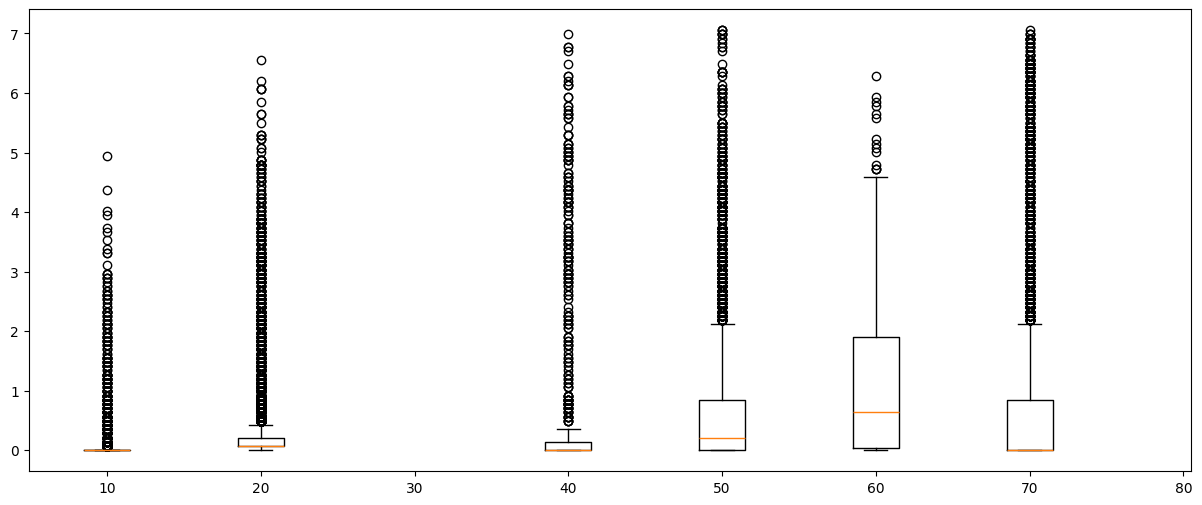

In [103]:
fig, ax = plt.subplots(figsize=(15,6))
mf_metrics_ds.isel(sensor_zenith_bins=slice(None, -1)).groupby('sensor_zenith_bins').map(histograms_to_boxplot, ax = ax)

In [46]:
little_ds = mf_metrics_ds.sel(forest_mask_bins=0, sensor_zenith_bins=40, ref_bins=20).isel(time=4)
little_ds = little_ds.dropna(dim='biais_bins')
np.repeat(little_ds['biais_bins'], repeats=little_ds['n_occurrences'])

<xarray.DataArray 'biais_bins' (biais_bins: 6)> Size: 48B
array([-15,  42,  59,  61,  66,  69])
Coordinates:
  * biais_bins          (biais_bins) int64 48B -15 42 59 61 66 69
    ref_bins            int64 8B 20
    sensor_zenith_bins  int64 8B 40
    forest_mask_bins    float64 8B 0.0
    time                datetime64[ns] 8B 2024-03-05

In [48]:
mf_metrics_ds.sum(dim=('ref_bins', 'forest_mask_bins', 'time', 'sensor_zenith_bins'))

<xarray.Dataset> Size: 3kB
Dimensions:        (biais_bins: 201)
Coordinates:
  * biais_bins     (biais_bins) int64 2kB -100 -99 -98 -97 -96 ... 97 98 99 100
Data variables:
    n_occurrences  (biais_bins) float64 2kB 4.0 8.0 9.0 4.0 ... 0.0 0.0 0.0 0.0

In [9]:
mf_metrics_ds.sel(forest_mask_bins=0, sensor_zenith_bins=10).isel(time=1).groupby('ref_bins').map(histograms_to_boxplot)

<xarray.DataArray 'n_occurrences' (biais_bins: 201, ref_bins: 1)> Size: 2kB
[201 values with dtype=float64]
Coordinates:
  * biais_bins          (biais_bins) int64 2kB -100 -99 -98 -97 ... 97 98 99 100
  * ref_bins            (ref_bins) int64 8B 0
    sensor_zenith_bins  int64 8B 10
    forest_mask_bins    float64 8B 0.0
    time                datetime64[ns] 8B 2024-03-02


ValueError: ndmin bigger than allowable number of dimensions NPY_MAXDIMS (=64)

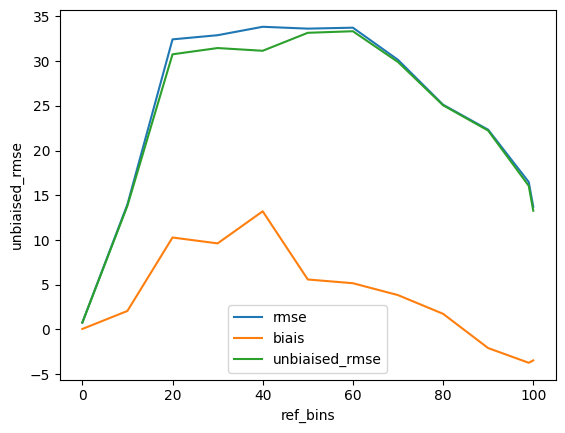

In [91]:
import matplotlib.pyplot as plt
res = mf_metrics_ds.groupby('ref_bins').map(histograms_to_biais_rmse)
fig, ax = plt.subplots()
res['rmse'].plot.line(ax=ax, label='rmse')
res['biais'].plot.line(ax=ax, label='biais')
res['unbiaised_rmse'].plot.line(ax=ax, label='unbiaised_rmse')
ax.legend()


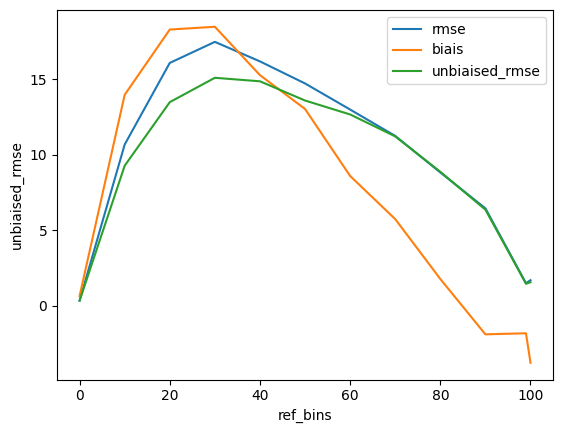

In [6]:
import matplotlib.pyplot as plt
res = nasa_pseudo_l3_metrics_ds.groupby('ref_bins').map(biais_rmse)
fig, ax = plt.subplots()
res['rmse'].plot.line(ax=ax, label='rmse')
res['biais'].plot.line(ax=ax, label='biais')
res['unbiaised_rmse'].plot.line(ax=ax, label='unbiaised_rmse')
ax.legend()